<a href="https://colab.research.google.com/github/MohebZandi/Deep_Learning_NLP/blob/main/Book_Deep_Learning_NLP_Jason_Brownlee_2020_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book_Deep_Learning_NLP_Jason Brownlee_2020**

> Indented block



# Part II
### Foundations






#### Chapter 1
#### Natural Language Processing

What natural language is and how it is different from other types of data.

What makes working with natural language so challenging.

Where the field of NLP came from and how it is defined by modern practitioners.


#### Chapter 2
#### Deep Learning

-  The motivation for exploring and adopting large neural network models.
-  The perspective on deep learning as hierarchical feature learning.
-  The promise of scalability of deep learning with the size of data.



#### Chapter 3
#### Promise of Deep Learning for Natural Language

1- The Promise of Drop-in Replacement Models. That is, deep learning methods can
be dropped into existing natural language systems as replacement models that can achieve
commensurate or better performance.

2- The Promise of New NLP Models. That is, deep learning methods oer the op-
portunity of new modeling approaches to challenging natural language problems like
sequence-to-sequence prediction.

3- The Promise of Feature Learning. That is, that deep learning methods can learn
the features from natural language required by the model, rather than requiring that the
features be specified and extracted by an expert.

4- The Promise of Continued Improvement. That is, that the performance of deep
learning in natural language processing is based on real results and that the improvements
appear to be continuing and perhaps speeding up.

5- The Promise of End-to-End Models. That is, that large end-to-end deep learning
models can be fit on natural language problems oering a more general and better-
performing approach.

#### Chapter 4
#### How to Develop Deep Learning Models With Keras

Keras Model Life-Cycle

Below is an overview of the 5 steps in the neural network model life-cycle in Keras:
1. Define Network.
2. Compile Network.
3. Fit Network.
4. Evaluate Network.
5. Make Predictions.



In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

from keras.layers import LSTM, Bidirectional, Dense, Activation
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam,Nadam, SGD


In [ ]:
# Step 1: Define Network

model = Sequential()
model.add(Dense(2))

# or

layers = [Dense(2)]
model = Sequential(layers)

In [ ]:
# For example, a small Multilayer Perceptron model
# with 2 inputs in the visible layer, 5 neurons in the hidden layer and one neuron in the output
# layer can be defined as:

model = Sequential()
model.add(Dense(5, input_dim=2))
model.add(Dense(1))


In [ ]:
# activation functions that transform a summed signal from each neuron in a layer can be extracted and
# added to the Sequential as a layer-like object called the Activation class.

model = Sequential()
model.add(Dense(5, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

The choice of Activation function is most important for the output layer as it will define the format that predictions will take. 

For example, below are some common predictive modeling
problem types and the structure and standard activation function that you can use in the output

layer:
1- Regression: Linear activation function, or *linear*, and the number of neurons matching
the number of outputs.

2- Binary Classification (2 class): Logistic activation function, or *sigmoid*, and one
neuron the output layer.

3- Multiclass Classification (>2 class): Softmax activation function, or *softmax*, and
one output neuron per class value, assuming a one hot encoded output pattern.

In [ ]:
# Step 1: Compile Network

# Example of compiling a defined model.
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
# Alternately, the optimizer can be created and configured before being provided as an argument
# to the compilation step.

algorithm = SGD(lr=0.1, momentum=0.3)
model.compile(optimizer=algorithm, loss='mean_squared_error')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Below are some standard loss functions for dierent predictive
model types:

- Regression: Mean Squared Error or *mean_squared_error*.

- Binary Classification (2 class): Logarithmic Loss, also called cross-entropy or
*binary_crossentropy*.

- Multiclass Classification (>2 class): Multiclass Logarithmic Loss or *categorical_crossentropy*.

The most common optimization algorithm is *stochastic gradient descent(sgd)*, but Keras also
supports a suite of other state-of-the-art optimization algorithms that work well with little or
no configuration. Perhaps the most commonly used optimization algorithms because of their
generally better performance are:

- Stochastic Gradient Descent, or *sgd*, that requires the tuning of a learning rate and
momentum.

- Adam, or *adam*, that requires the tuning of learning rate.

- RMSprop, or *rmsprop*, that requires the tuning of learning rate.

In [ ]:
# Generally, the most useful additional metric to collect is accuracy for classification
# problems. The metrics to collect are specified by name in an array. For example:

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

## Step 3. Fit Network

Once the network is compiled, it can be fit, which means adapt the weights on a training dataset.

Fitting the network requires the training data to be specified, both a matrix of input patterns, X,
and an array of matching output patterns, y.

**Example of fitting a compiled model.**

history = model.fit(X, y, batch_size=10, epochs=100)

#

#

Once fit, a history object is returned that provides a summary of the performance of the
model during training. 

This includes both the loss and any additional metrics specified when
compiling the model, recorded each epoch.

You can reduce the amount of information displayed to just the
loss each epoch by setting the verbose argument to 2. 

You can turn off all output by setting
verbose to 0. For example:

#

history = model.fit(X, y, batch_size=10, epochs=100, verbose=0)

## **Step 4. Evaluate Network**

The model evaluates the loss across all of the test patterns, as well as any other metrics
specified when the model was compiled, like classification accuracy. 

A list of evaluation metrics
is returned. 

For example, for a model compiled with the accuracy metric, we could evaluate it
on a new dataset as follows:

loss, accuracy = model.evaluate(X, y)

#

#

Turn off verbose:

loss, accuracy = model.evaluate(X, y, verbose=0)

## **Step 5. Make Predictions**

Once we are satisfied with the performance of our fit model, we can use it to make predictions
on new data. 

This is as easy as calling the *predict()* function on the model with an array of
new input patterns. 

For example:

predictions = model.predict(X)


The predictions will be returned in the format provided by the output layer of the network.

- In the case of a regression problem, these predictions may be in the format of the problem
directly, provided by a linear activation function. 

- For a binary classification problem, the
predictions may be an array of probabilities for the first class that can be converted to a 1 or 0
by rounding.

- For a multiclass classification problem, the results may be in the form of an array of
probabilities (assuming a one hot encoded output variable) that may need to be converted to a
single class output prediction using the *argmax()* NumPy function. 

Alternately, for classification
problems, we can use the *predict_classes()* function that will automatically convert uncrisp
predictions to crisp integer class values.

predictions = model.predict_classes(X)

## Standard Network Models

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 20)                220       
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


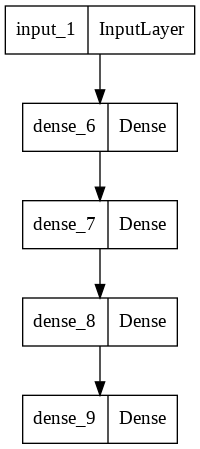

In [ ]:
# Multilayer Perceptron
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
model.summary()
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 61, 61, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 16)        8208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 13, 13, 10)        170   

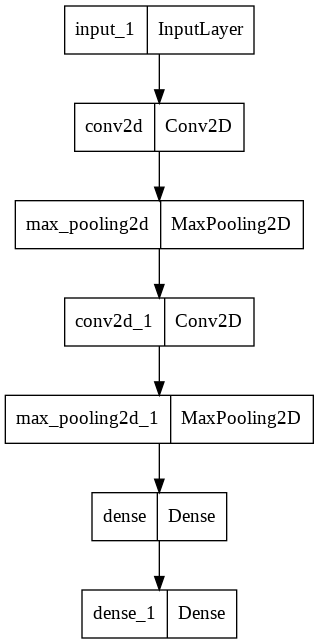

In [ ]:
# Convolutional Neural Network (CNN)
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
visible = Input(shape=(64,64,1))
conv1 = Conv2D(32, (4,4), activation='relu')(visible)
pool1 = MaxPooling2D()(conv1)
conv2 = Conv2D(16, (4,4), activation='relu')(pool1)
pool2 = MaxPooling2D()(conv2)
hidden1 = Dense(10, activation='relu')(pool2)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
# summarize layers
model.summary()
# plot graph
plot_model(model, to_file='convolutional_neural_network.png')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


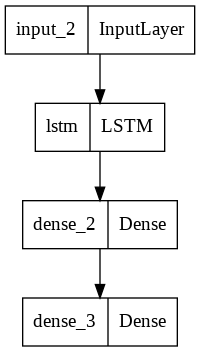

In [ ]:
# Recurrent Neural Network (RNN)
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
visible = Input(shape=(100,1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
# summarize layers
model.summary()
# plot graph
plot_model(model, to_file='recurrent_neural_network.png')

# Part III
### Data Preparation


- How to Clean Text Manually and with NLTK

- How to Prepare Text Data with scikit-learn

- How to Prepare Text Data With Keras

### How to Clean Text Manually and with NLTK

Text Cleaning Is Task Specific

Take a moment to look at the text. What do you notice? Here's what I see:

- It's plain text so there is no markup to parse (yay!).
- The translation of the original German uses UK English (e.g. travelling).
- The lines are artificially wrapped with new lines at about 70 characters (meh)
- There are no obvious typos or spelling mistakes.
- There's punctuation like commas, apostrophes, quotes, question marks, and more.
- There's hyphenated descriptions like armour-like.
- There's a lot of use of the em dash (-) to continue sentences (maybe replace with commas?).
- There are names (e.g. Mr. Samsa)
- There does not appear to be numbers that require handling (e.g. 1999)
- There are section markers (e.g. II and III ).

In [ ]:
# Manual Tokenization

# Split by Whitespace

from google.colab import files

uploaded = files.upload()

Saving metamorphosis_clean.txt to metamorphosis_clean.txt


In [ ]:
# load text
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()

file.close()
# split into words by white space
words = text.split()
print(words[:100])

['\ufeffOne', 'morning,', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'He', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'His', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"What\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'It', "wasn't", 'a', 'dream.', 'His', 'room,', 'a', 'proper', 'human']


In [ ]:
# Select Words

# Another approach might be to use the regex model (re) and split the document into words by
# selecting for strings of alphanumeric characters (a-z, A-Z, 0-9 and ` '). For example:

import re
# load text
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split based on words only
words = re.split(r'\W+', text)
print(words[:100])

['', 'One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armour', 'like', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'What', 's', 'happened', 'to', 'me', 'he', 'thought', 'It', 'wasn', 't', 'a', 'dream', 'His']


In [ ]:
# Split by Whitespace and Remove Punctuation

import string

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# We can use regular expressions to select for the punctuation characters and use the sub()
# function to replace them with nothing. For example:

re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in words]

In [ ]:
# We can put all of this together, load the text file, split it into words by white space, then
# translate each word to remove the punctuation.

import string
import re
# load text
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words by white space
words = text.split()
# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in words]
print(stripped[:100])

['\ufeffOne', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armourlike', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'Whats', 'happened', 'to', 'me', 'he', 'thought', 'It', 'wasnt', 'a', 'dream', 'His', 'room', 'a', 'proper', 'human']


In [ ]:
# Sometimes text data may contain non-printable characters.

re_print = re.compile('[^%s]' % re.escape(string.printable))
result = [re_print.sub('', w) for w in words]
print(result[:100])

['One', 'morning,', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'He', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'His', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"What\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'It', "wasn't", 'a', 'dream.', 'His', 'room,', 'a', 'proper', 'human']


In [ ]:
# Normalizing Case

# We can convert all words to lowercase by calling the lower() function on each
# word. For example:

words = text.split()
# convert to lower case
words = [word.lower() for word in words]
print(words[:100])

['\ufeffone', 'morning,', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'he', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'the', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'his', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"what\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'it', "wasn't", 'a', 'dream.', 'his', 'room,', 'a', 'proper', 'human']


### Tokenization and Cleaning with NLTK

In [ ]:
import nltk
# nltk.download()

In [ ]:
# NLTK script to split text into sentences.


# nltk.download('punkt')
from nltk import sent_tokenize
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into sentences
sentences = sent_tokenize(text)
print(sentences[0])

﻿One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.


In [ ]:
# NLTK script to split text into words.

from nltk.tokenize import word_tokenize
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
print(tokens[:100])

['\ufeffOne', 'morning', ',', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', ',', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', '.', 'He', 'lay', 'on', 'his', 'armour-like', 'back', ',', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', ',', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', '.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', '.', 'His', 'many', 'legs', ',', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', ',', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', '.', '``', 'What', "'s", 'happened', 'to']


In [ ]:
# NLTK script to remove punctuation.


from nltk.tokenize import word_tokenize
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words[:100])

['morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'What', 'happened', 'to', 'me', 'he', 'thought', 'It', 'was', 'a', 'dream', 'His', 'room', 'a', 'proper', 'human', 'room', 'although']


In [ ]:
# Filter out Stop Words (and Pipeline)


# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)
print(len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Stop Words:

You can see that they are all lower case and have punctuation removed. 

You could compare
your tokens to the stop words and filter them out, but you must ensure that your text is prepared
the same way. 

Let's demonstrate this with a small pipeline of text preparation including:
-  Load the raw text.
-  Split into tokens.
-  Convert to lowercase.
-  Remove punctuation from each token.
-  Filter out remaining tokens that are not alphabetic.
-  Filter out tokens that are stop words.

In [ ]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['morning', 'gregor', 'samsa', 'woke', 'troubled', 'dreams', 'found', 'transformed', 'bed', 'horrible', 'vermin', 'lay', 'armourlike', 'back', 'lifted', 'head', 'little', 'could', 'see', 'brown', 'belly', 'slightly', 'domed', 'divided', 'arches', 'stiff', 'sections', 'bedding', 'hardly', 'able', 'cover', 'seemed', 'ready', 'slide', 'moment', 'many', 'legs', 'pitifully', 'thin', 'compared', 'size', 'rest', 'waved', 'helplessly', 'looked', 'happened', 'thought', 'nt', 'dream', 'room', 'proper', 'human', 'room', 'although', 'little', 'small', 'lay', 'peacefully', 'four', 'familiar', 'walls', 'collection', 'textile', 'samples', 'lay', 'spread', 'table', 'samsa', 'travelling', 'salesman', 'hung', 'picture', 'recently', 'cut', 'illustrated', 'magazine', 'housed', 'nice', 'gilded', 'frame', 'showed', 'lady', 'fitted', 'fur', 'hat', 'fur', 'boa', 'sat', 'upright', 'raising', 'heavy', 'fur', 'muff', 'covered', 'whole', 'lower', 'arm', 'towards', 'viewer', 'gregor']


Running this example, we can see that in addition to all of the other transforms, stop words
like a and to have been removed. I note that we are still left with tokens like *nt*. The rabbit
hole is deep; there's always more we can do.

Stem Words

Stemming refers to the process of reducing each word to its root or base. For example *fishing,
fished, fisher* all reduce to the stem **fish**.

There are many stemming algorithms,
although a popular and long-standing method is the *Porter Stemming* algorithm. This method
is available in NLTK via the *PorterStemmer* class.

In [ ]:
# NLTK script stem words.
# the stemming implementation has also reduced
# the tokens to lowercase, likely for internal look-ups in word tables.


from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
# stemming of words
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in tokens]
print(stemmed[:100])

['\ufeffone', 'morn', ',', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubl', 'dream', ',', 'he', 'found', 'himself', 'transform', 'in', 'hi', 'bed', 'into', 'a', 'horribl', 'vermin', '.', 'He', 'lay', 'on', 'hi', 'armour-lik', 'back', ',', 'and', 'if', 'he', 'lift', 'hi', 'head', 'a', 'littl', 'he', 'could', 'see', 'hi', 'brown', 'belli', ',', 'slightli', 'dome', 'and', 'divid', 'by', 'arch', 'into', 'stiff', 'section', '.', 'the', 'bed', 'wa', 'hardli', 'abl', 'to', 'cover', 'it', 'and', 'seem', 'readi', 'to', 'slide', 'off', 'ani', 'moment', '.', 'hi', 'mani', 'leg', ',', 'piti', 'thin', 'compar', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', ',', 'wave', 'about', 'helplessli', 'as', 'he', 'look', '.', '``', 'what', "'s", 'happen', 'to']


Additional Text Cleaning Considerations

Here is a shortlist of additional considerations when cleaning text:
-  Handling large documents and large collections of text documents that do not fit into
memory.
-  Extracting text from markup like HTML, PDF, or other structured document formats.
-  Transliteration of characters from other languages into English.
-  Decoding Unicode characters into a normalized form, such as UTF8.
-  Handling of domain specific words, phrases, and acronyms.
-  Handling or removing numbers, such as dates and amounts.
-  Locating and correcting common typos and misspellings.

### How to Prepare Text Data with scikit-learn

After completing this tutorial, you will know:
-  How to convert text to word count vectors with *CountVectorizer.*
-  How to convert text to word frequency vectors with *TfidfVectorizer.*
-  How to convert text to unique integers with *HashingVectorizer.*

The Bag-of-Words Model

The model is simple in that it throws away all of the order
information in the words and focuses on the occurrence of words in a document.

This can be done by assigning each word a unique number.

Then any document we see can be encoded
as a fixed-length vector with the length of the vocabulary of known words. 

The value in each position in the vector could be filled with a count or frequency of each word in the encoded
document.

The scikit-learn library provides 3 different schemes that we can use, and we will briefly look at each.

- Word Counts with **CountVectorizer**

The CountVectorizer provides a simple way to both tokenize a collection of text documents
and build a vocabulary of known words, but also to encode new documents using that vocabulary.

An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document. 

Because these vectors will
contain a lot of zeros, we call them sparse. Python provides an efficient way of handling sparse vectors in the scipy.sparse package. 

The vectors returned from a call to transform() will
be sparse vectors, and you can transform them back to NumPy arrays to look and better understand what is going on by calling the toarray() function. 

Below is an example of using
the CountVectorizer to tokenize, build a vocabulary, and then encode a document.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print('\nshape of the encoded document: ',vector.shape)
print(type(vector))
print()
print('sparse vector:\n',vector)
print()
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}

shape of the encoded document:  (1, 8)
<class 'scipy.sparse.csr.csr_matrix'>

sparse vector:
   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	2

[[1 1 1 1 1 1 1 2]]


In [ ]:
# Importantly, the same vectorizer can be used on documents that contain words not included
# in the vocabulary.


# encode another document
text2 = ["the puppy"]
vector = vectorizer.transform(text2)
print(vector.toarray())


# The encoded vectors can then be used directly with a machine learning algorithm.

[[0 0 0 0 0 0 0 1]]


- **Word Frequencies with TfidfVectorizer**

Without going into the math, TF-IDF are word frequency scores that try to highlight
words that are more interesting, e.g. frequent in a document but not across documents.

- Term Frequency (tf): This summarizes how often a given word appears within a document.
- Inverse Document Frequency (idf): This downscales words that appear a lot across documents.

The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.

Alternately, if you already have a
learned *CountVectorizer*, you can use it with a **TfidfTransformer** to just calculate the inverse
document frequencies and start encoding documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
"The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print('\ntf_idf vector:\n',vectorizer.idf_)

# encode document, the first text
vector = vectorizer.transform([text[0]])

# summarize encoded vector
print('\nvector shape: ', vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}

tf_idf vector:
 [1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]

vector shape:  (1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


- Hashing with HashingVectorizer

Counts and frequencies can be very useful, but one limitation of these methods is that the vocabulary can become very large. This, in turn, will require large vectors for encoding
documents and impose large requirements on memory and slow down algorithms. 

A clever work
around is to use a one way hash of words to convert them to integers. 

The clever part is that
no vocabulary is required and you can choose an arbitrary-long fixed length vector.

A downside is that the hash is a one-way function so there is no way to convert the encoding back to a word
(which may not matter for many supervised learning tasks).


The values
of the encoded document correspond to normalized word counts by default in the range of -1 to 1, but could be made simple integer counts by changing the default configuration.

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = HashingVectorizer(n_features=20)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1, 20)
[[ 0.          0.          0.          0.          0.          0.33333333
   0.         -0.33333333  0.33333333  0.          0.          0.33333333
   0.          0.          0.         -0.33333333  0.          0.
  -0.66666667  0.        ]]


### How to Prepare Text Data With Keras

The Keras deep learning library provides some basic tools to help you
prepare your text data. 

In this tutorial, you will discover how you can use Keras to prepare
your text data.

- About the convenience methods that you can use to quickly prepare text data.
- The Tokenizer API that can be fit on training data and used to encode training, validation,
and test documents.
- The range of 4 different document encoding schemes oered by the Tokenizer API.

**Split Words with text to word sequence**

Keras provides the
text to word sequence() function that you can use to split text into a list of words. 

By default, this function automatically does 3 things:

- Splits words by space.
- Filters out punctuation.
- Converts text to lowercase (lower=True).

You can change any of these defaults by passing arguments to the function.



In [ ]:
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# tokenize the document
result = text_to_word_sequence(text)
print(result)

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


**Encoding with one hot**

In addition to the text, the vocabulary size (total words) must be specified. 

This could be the
total number of words in the document or more if you intend to encode additional documents
that contains additional words.

We can use the text to word sequence() function from the previous section to split the
document into words and then use a set to represent only the unique words in the document.

In [ ]:
# Note: Given the stochastic nature of neural networks, your specific results may vary. Consider
# running the example a few times.

# Example of one hot encoding.

from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document
result = one_hot(text, round(vocab_size*1.3))
print(result)

8
[7, 7, 8, 5, 8, 7, 7, 8, 4]


**Hash Encoding with hashing trick**

A limitation of integer and count base encodings is that they must maintain a vocabulary of
words and their mapping to integers. 

An alternative to this approach is to use a one-way hash
function to convert words to integers. 

This avoids the need to keep track of a vocabulary, which
is faster and requires less memory.



In [ ]:
# Example of hash encoding.

from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document
result = hashing_trick(text, round(vocab_size*1.3), hash_function='md5')
print(result)

8
[6, 4, 1, 2, 7, 5, 6, 2, 6]


**Tokenizer API**


Keras provides a more sophisticated API for preparing text that can be fit and reused to prepare multiple text documents.

This may be the preferred approach for large projects. 

Keras provides
the Tokenizer class for preparing text documents for deep learning. 

The Tokenizer must be constructed and then fit on either raw text documents or integer encoded text documents.



In [ ]:
from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)

Once fit, the Tokenizer provides 4 attributes that you can use to query what has been
learned about your documents:
- word counts: A dictionary mapping of words and their occurrence counts when the Tokenizer was fit.
- word docs: A dictionary mapping of words and the number of documents that reach appears in.
- word index: A dictionary of words and their uniquely assigned integers.
- document count: A dictionary mapping and the number of documents they appear in calculated during the fit.

In [ ]:
# summarize what was learned
print('word_counts:\n', t.word_counts)
print('\ndocument_count:\n',t.document_count)
print('\n\nword_index:\n',t.word_index)
print('\nword_docs:\n',t.word_docs)

word_counts:
 OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])

document_count:
 5


word_index:
 {'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}

word_docs:
 defaultdict(<class 'int'>, {'done': 1, 'well': 1, 'good': 1, 'work': 2, 'effort': 1, 'great': 1, 'nice': 1, 'excellent': 1})


Once the Tokenizer has been fit on training data, it can be used to encode documents in
the train or test datasets. 

The *texts_to_matrix()* function on the *Tokenizer* can be used to
create one vector per document provided per input. 

The length of the vectors is the total size
of the vocabulary. 

This function provides a suite of standard bag-of-words model text encoding
schemes that can be provided via a mode argument to the function.

The modes available include:
- **binary**: Whether or not each word is present in the document. This is the **default**.
- **count**: The count of each word in the document.
- **tfidf**: The Text Frequency-Inverse DocumentFrequency (TF-IDF) scoring for each word in the document.
- **freq**: The frequency of each word as a ratio of words within each document.

**The Tokenizer will be the key way we will prepare text for word embeddings throughout this book.**

In [ ]:
# We can put all of this together with a worked example.

from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print('\n\ntexts_to_matrix:\n',encoded_docs)

OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'done': 1, 'well': 1, 'good': 1, 'work': 2, 'effort': 1, 'great': 1, 'nice': 1, 'excellent': 1})


texts_to_matrix:
 [[0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Part IV Bag-of-Words

The bag-of-words model is a way of representing text data when modeling text with machine learning algorithms.

In this
tutorial, you will discover the bag-of-words model for feature extraction in natural language
processing. 

After completing this tutorial, you will know:
- What the bag-of-words model is and why it is needed to represent text.
- How to develop a bag-of-words model for a collection of documents.
- How to use dierent techniques to prepare a vocabulary and score words.

Machine learning algorithms cannot work
with raw text directly; the text must be converted into numbers. 

Specifically, vectors of numbers.

*In language processing, the vectors x are derived from textual data, in order to reflect various linguistic properties of the text.*

This is called feature extraction or feature encoding. 

A popular and simple method of feature extraction with text data is called the bag-of-words model of text.

The approach is very simple and 
flexible, and can be used in a myriad of ways for extracting features from documents. 

A bag-of-words is a representation of text that describes the occurrence of words within a document. 

It involves two things:
- A vocabulary of known words.
- A measure of the presence of known words.

It is called a bag-of-words , because any information about the order or structure of words in the document is discarded. 

The model is only concerned with whether known words **occur** in
the document, **not where** in the document.

*A very common feature extraction procedures for sentences and documents is the bag-of-words approach (BOW). In this approach, we look at the histogram of the
words within the text, i.e. considering each word count as a feature.*

The bag-of-words can be as simple or complex as you like. 

The complexity comes both in deciding how to design
the vocabulary of known words (or tokens) and how to score the presence of known words.



**Example of the Bag-of-Words Model**

Sample of text from A Tale of Two Cities by Charles Dickens.

It was the best of times,

it was the worst of times,

it was the age of wisdom,

it was the age of foolishness,

For this small example, let's treat each line as a separate document and the 4 lines as our entire corpus of documents.

**list of all of the words in our model vocabulary.**
- it
- was
- the
- best
- of
- times
- worst
- age
- wisdom
- foolishness

That is a vocabulary of 10 words from a corpus containing 24 words.

**Create Document Vectors**

Because
we know the vocabulary has 10 words, we can use a fixed-length document representation of 10, with one position in the vector to score each word. 

The simplest scoring method is to mark the
presence of words as a boolean value, 0 for absent, 1 for present.

first document (It was the best of times) and convert it into a binary vector. The scoring of the document would look as follows:

- it = 1
-was = 1
-the = 1
-best = 1
-of = 1
-times = 1
-worst = 0
-age = 0
-wisdom = 0
-foolishness = 0

As a binary vector, this would look as follows:

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

The other three documents would look as follows:

- "it was the worst of times" = [1, 1, 1, 0, 1, 1, 1, 0, 0, 0]
- "it was the age of wisdom" = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]
- "it was the age of foolishness" = [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]

New documents that
overlap with the vocabulary of known words, but may contain words outside of the vocabulary, can still be encoded, where only the **occurrence of known words** are scored and unknown words are ignored.

**Managing Vocabulary**

You can
imagine that for a very large corpus, such as thousands of books, that the length of the vector
might be thousands or millions of positions. Further, each document may contain very few of the known words in the vocabulary.

This results in a vector with lots of zero scores, called a sparse vector or sparse representation.

Sparse vectors require more memory and computational resources when modeling and the vast number of positions or dimensions can make the modeling process very challenging for traditional algorithms. 

As such, there is pressure to decrease the size of the vocabulary when
using a bag-of-words model.

There are simple text cleaning techniques that can be used as a first step, such as:

- Ignoring case.
- Ignoring punctuation.
- Ignoring frequent words that don't contain much information, called **stop words**, like a, of, etc.
- Fixing misspelled words.
- Reducing words to their stem (e.g. play from playing) using stemming algorithms.

-----------------------------------------
A more sophisticated approach is to create a vocabulary of grouped words. This both
changes the scope of the vocabulary and allows the bag-of-words to capture a little bit more
meaning from the document. 

In this approach, each word or token is called a *gram*. 

Creating a vocabulary of *two-word pairs* is, in turn, called a *bigram* model. 

Again, only the bigrams that
appear in the corpus are modeled, not all possible bigrams.

An n-gram is an n-token sequence of words: a 2-gram (more commonly called a
bigram) is a two-word sequence of words like \please turn", \turn your", or \your homework", and a 3-gram (more commonly called a **trigram**) is a three-word sequence of words like \please turn your", or \turn your homework".
- 
Often a simple
bigram approach is better than a 1-gram bag-of-words model for tasks like documentation
classification.

**Scoring Words**


- Word Hashing
Words are hashed deterministically to the same integer index in the target hash space. A binary score or count can then be used to score the word. 

    This is called the hash trick or feature
    hashing. 

    The challenge is to choose a hash space to accommodate the chosen vocabulary size to minimize the probability of collisions and trade-of sparsity.

- TF-IDF
    
    **Term Frequency (TF)**: is a scoring of the frequency of the word in the current document.
    
    **Inverse Document Frequency (IDF)**: is a scoring of how rare the word is across documents.
    
    The scores are a weighting where not all words are equally as important or interesting. 
    
    The scores have the eect of highlighting words that are distinct (contain useful information) in a given document.

**Limitations of Bag-of-Words**

The bag-of-words model is very simple to understand and implement and offers a lot of exibility for customization on your specific text data. 

It has been used with great success on prediction
problems like language modeling and documentation classification. 

Nevertheless, it suffers from some shortcomings, such as:

- **Vocabulary**: The vocabulary requires careful design, most specifically in order to manage
the size, which impacts the sparsity of the document representations.

- **Sparsity**: Sparse representations are harder to model both for computational reasons
(space and time complexity) and also for information reasons, where the challenge is for
the models to harness so little information in such a large representational space.

- **Meaning**: Discarding word order ignores the context, and in turn meaning of words in
the document (semantics). Context and meaning can offer a lot to the model, that if
modeled could tell the difference between the same words differently arranged (this is interesting vs is this interesting), synonyms (old bike vs used bike), and much more.

## **How to Prepare Movie Review Data for Sentiment Analysis**

**Text data preparation is dierent for each problem.**

Preparation starts with simple steps, like
loading data, but quickly gets dicult with cleaning tasks that are very specific to the data you
are working with. 

You need help as to where to begin and what order to work through the steps
from raw data to data ready for modeling. 

In this tutorial, you will discover how to prepare
movie review text data for sentiment analysis, step-by-step. 

After completing this tutorial, you will know:
- How to load text data and clean it to remove punctuation and other non-words.
- How to develop a vocabulary, tailor it, and save it to file.
- How to prepare movie reviews using cleaning and a pre-defined vocabulary and save them to new files ready for modeling.

This tutorial is divided into the following parts:
1. Movie Review Dataset
2. Load Text Data
3. Clean Text Data
4. Develop Vocabulary
5. Save Prepared Data

Our data contains 1000 positive and 1000 negative reviews all written before 2002,
with a cap of 20 reviews per author (312 authors total) per category. We refer to this corpus as the polarity dataset.

The data has been cleaned up somewhat, for example:
- The dataset is comprised of only English reviews.
- All text has been converted to lowercase.
- There is white space around punctuation like periods, commas, and brackets.
- Text has been split into one sentence per line.

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')     # Mounting Google Drive in Colab

Mounted at /content/gdrive


In [21]:
# Test the reading of the file from Drive

with open('/content/gdrive/My Drive/txt_sentoken/neg/cv000_29416.txt', 'r') as f:
    text_neg = f.read()
# print(text_neg)

In [26]:
# We can turn this into a function called load doc() that takes a filename of the document to load and
# returns the text.

def load_doc(filename):
    # open the file as read only
    with open(filename, 'r') as f:
        text = f.read()
    # close the file
    file.close()
    return text

In [30]:
# %%capture   ------------------------->>>   to hide the cell output

# We have two directories each with 1,000 documents each. We can process each directory in
# turn by first getting a list of files in the directory using the listdir() function, then loading
# each file in turn.


def load_doc(filename):
    # open the file as read only
    with open(filename, 'r') as f:
        text = f.read()
    # close the file
    file.close()
    return text

# specify directory in Google Drive to load in Colab
directory = '/content/gdrive/My Drive/txt_sentoken/neg'

from os import listdir

# walk through all files in the folder
i= 0 
for filename in listdir(directory):
    # skip files that do not have the right extension
    if not filename.endswith(".txt"):
        next
    # create the full path of the file to open
    path = directory + '/' + filename
    # load document
    doc = load_doc(path)
    i += 1
    print(i, 'Loaded %s' % filename)


1 Loaded cv020_9234.txt
2 Loaded cv018_21672.txt
3 Loaded cv016_4348.txt
4 Loaded cv012_29411.txt
5 Loaded cv017_23487.txt
6 Loaded cv015_29356.txt
7 Loaded cv014_15600.txt
8 Loaded cv011_13044.txt
9 Loaded cv019_16117.txt
10 Loaded cv013_10494.txt
11 Loaded cv010_29063.txt
12 Loaded cv003_12683.txt
13 Loaded cv006_17022.txt
14 Loaded cv007_4992.txt
15 Loaded cv008_29326.txt
16 Loaded cv002_17424.txt
17 Loaded cv001_19502.txt
18 Loaded cv005_29357.txt
19 Loaded cv004_12641.txt
20 Loaded cv009_29417.txt
21 Loaded cv000_29416.txt
22 Loaded cv070_13249.txt
23 Loaded cv056_14663.txt
24 Loaded cv053_23117.txt
25 Loaded cv052_29318.txt
26 Loaded cv051_10751.txt
27 Loaded cv058_8469.txt
28 Loaded cv055_8926.txt
29 Loaded cv057_7962.txt
30 Loaded cv059_28723.txt
31 Loaded cv054_4101.txt
32 Loaded cv069_11613.txt
33 Loaded cv062_24556.txt
34 Loaded cv068_14810.txt
35 Loaded cv067_21192.txt
36 Loaded cv064_25842.txt
37 Loaded cv066_11668.txt
38 Loaded cv065_16909.txt
39 Loaded cv061_9321.txt
40 

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
# Below is an updated version of cleaning this review for one file cv000_29416.txt

from nltk.corpus import stopwords
import string
import re

# # load doc into memory
# def load_doc(filename):
    # # open the file as read only
    # file = open(filename, 'r')
    # # read all text
    # text = file.read()
    # # close the file
    # file.close()
    # return text

directory = '/content/gdrive/My Drive/txt_sentoken/neg'
filename = 'cv000_29416.txt'
path = directory + '/' + filename

# load the document
text = load_doc(path)

# split into tokens by white space
tokens = text.split()

# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))

# remove punctuation from each word
tokens = [re_punc.sub('', w) for w in tokens]

# remove remaining tokens that are not alphabetic
tokens = [word for word in tokens if word.isalpha()]

# filter out stop words
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

# filter out short tokens
tokens = [word for word in tokens if len(word) > 1]
print(tokens)
print('\nNumber of Tokens:',len(tokens))

['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guys', 'dies', 'girlfriend', 'continues', 'see', 'life', 'nightmares', 'whats', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mindfuck', 'movie', 'teen', 'generation', 'touches', 'cool', 'idea', 'presents', 'bad', 'package', 'makes', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'ways', 'making', 'types', 'films', 'folks', 'didnt', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problems', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'starts', 'normal', 'downshifts', 'fantasy', 'world', 'audience', 'member', 'idea', 'whats', 'going', 'dreams', 'characters', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparitions', 'disappearances', 'looooot', 'chase', 'scen

# New Section